# Dataset Analysis

group: swift-swans

We have chosen the datasets **adept** and **pap** for our analysis.

In [13]:
# necessary imports
import json
import csv
import matplotlib.pyplot as plt



## Loading the Datasets

In [14]:
path_adept = "datasets/adept/train-dev-test-split/"
path_pap = "datasets/pap/train-dev-test-split/"


# adept

def no_label(dictionary):
    return {key: value for key, value in dictionary.items() if key!="label"}


with open(path_adept+"/train.json", "r", encoding="utf-8") as file:
    adept_train = json.load(file)    
with open(path_adept+"/val.json", "r", encoding="utf-8") as file:
    adept_val = json.load(file)   
with open(path_adept+"/test.json", "r", encoding="utf-8") as file:
    adept_test = json.load(file)


# pap with multiclasses

with open(path_pap + "/multiclass/train.csv") as file:
    pap_multi_train = list(csv.DictReader(file))
with open(path_pap + "/multiclass/dev.csv") as file:
    pap_multi_dev = list(csv.DictReader(file))
with open(path_pap + "/multiclass/test.csv") as file:
    pap_multi_test = list(csv.DictReader(file))


# pap with binary labels

with open(path_pap + "/binary/train.csv") as file:
    pap_bin_train = list(csv.DictReader(file))
with open(path_pap + "/binary/dev.csv") as file:
    pap_bin_dev = list(csv.DictReader(file))
with open(path_pap + "/binary/test.csv") as file:
    pap_bin_test = list(csv.DictReader(file))


In [15]:
# data-label splits 

# adept
adept_train_data = [no_label(instance) for instance in adept_train]
adept_train_labels = [instance['label'] for instance in adept_train]
adept_val_data = [no_label(instance) for instance in adept_train]
adept_val_labels = [instance['label'] for instance in adept_val]
adept_test_data = [no_label(instance) for instance in adept_train]
adept_test_labels = [instance['label'] for instance in adept_test]

# pap with multiclasses
pap_multi_train_data = [instance['text'] for instance in pap_multi_train]
pap_multi_train_labels = [instance['label'] for instance in pap_multi_train]
pap_multi_dev_data = [instance['text'] for instance in pap_multi_dev]
pap_multi_dev_labels = [instance['label'] for instance in pap_multi_dev]
pap_multi_test_data = [instance['text'] for instance in pap_multi_test]
pap_multi_test_labels = [instance['label'] for instance in pap_multi_test]

# pap with binary labels
pap_bin_train_data = [instance['text'] for instance in pap_bin_train]
pap_bin_train_labels = [instance['label'] for instance in pap_bin_train]
pap_bin_dev_data = [instance['text'] for instance in pap_bin_dev]
pap_bin_dev_labels = [instance['label'] for instance in pap_bin_dev]
pap_bin_test_data = [instance['text'] for instance in pap_bin_test]
pap_bin_test_labels = [instance['label'] for instance in pap_bin_test]

---
## Analysis: adept

| class label | meaning          |
|:-----------:|:-----------------|
| 1           | impossible       |
| 2           |                  |
| 3           |                  |
| 4           |                  |
| 5           | necessarily true |

In [16]:
print("total istances in adept train set: " + str(len(adept_train_data)))

total istances in adept train set: 12892


#### Characteristic 1: Label Distribution across splits

In [17]:
# function for counting labels
def count_labels(labels):
    labels_lst = {}
    for label in labels:

        if label not in labels_lst.keys(): 
            labels_lst[label] = 1 # create new entry if key does not exist
        else:
            labels_lst[label] += 1 # count up if key exists

    # sort labels by keys
    sorted_labels = dict(sorted(labels_lst.items()))

    return sorted_labels

# count labels from each split
adept_train_labels_counts = count_labels(adept_train_labels)
adept_test_labels_counts = count_labels(adept_test_labels)
adept_val_labels_counts = count_labels(adept_val_labels)

# printing label counts for each split
print('ADEPT: Label counts for each split')
print(f'train set: {adept_train_labels_counts}')
print(f'test set: {adept_test_labels_counts}')
print(f'val set: {adept_val_labels_counts}')


ADEPT: Label counts for each split
train set: {0: 1762, 1: 1504, 2: 8633, 3: 928, 4: 65}
test set: {0: 223, 1: 178, 2: 1102, 3: 102, 4: 7}
val set: {0: 236, 1: 186, 2: 1070, 3: 102, 4: 17}


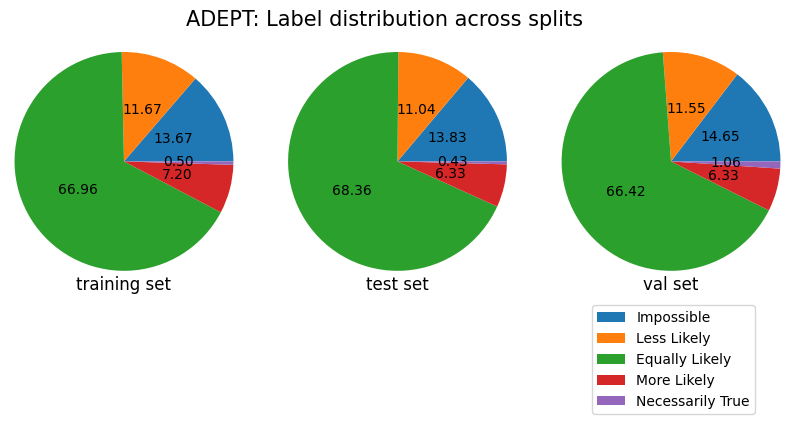

In [18]:
# visualize labels distribution
label_names = ["Impossible", "Less Likely", "Equally Likely", "More Likely", "Necessarily True"]
train_counts = list(adept_train_labels_counts.values())
test_counts = list(adept_test_labels_counts.values())
val_counts = list(adept_val_labels_counts.values())

# create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(10,3)
fig.suptitle("ADEPT: Label distribution across splits", y=1, fontsize=15)
fig.subplots_adjust(wspace=.2)

# plot each pie chart in a separate subplot
ax1.pie(train_counts, labeldistance=None, autopct='%.2f', radius=1.2, pctdistance=0.5)
ax1.set_title("training set", y=-0.1)
ax2.pie(test_counts, labeldistance=None, autopct='%.2f', radius=1.2, pctdistance=0.5)
ax2.set_title("test set", y=-0.1)
ax3.pie(val_counts, labeldistance=None, autopct='%.2f', radius=1.2, pctdistance=0.5)
ax3.set_title("val set", y=-0.1)

# set legend
ax3.legend(label_names, bbox_to_anchor=(0.9, -0.1), loc='upper right')


- The pie charst show comparison of ADEPT dataset label distribution across three splits: train, test, and val.
- Label distribution is consistent across all split.
- The majority of data is labelled as "Equally Likely" which dominates more than half of the charts.
- The second largest segment are "Impossible" and "less Likely", taking up approximately one eighth of the charts.
- There is almost less than 2% of data labelled as "Necessarily True".

#### Characteristic 2: Top/Bottom 10 modifiers in training set

In [19]:
# function for counting unique words in features "modifier" and "noun"
def count_feature(data, feature_type):
    # loading feature
    feature = [instance[feature_type] for instance in data]
    word_lst = {}

    for word in feature:

        if word not in word_lst.keys():
            word_lst[word] = 1
        else:
            word_lst[word] += 1

    sorted_words = sorted(word_lst.items(), key=lambda x:x[1], reverse=True)
    return sorted_words


In [20]:
# counting top/bottom 10 modifeirs in train set
count_modifier = count_feature(adept_train, "modifier")
print(f"top 10 modifier in train set:")
print(count_modifier[:10])
print(f"bottom 10 modifier in train set:")
print(count_modifier[-10:])
print("======================")
print(f"total number of unique modifers: {len(count_modifier)}")

top 10 modifier in train set:
[('virtual', 378), ('former', 354), ('dead', 299), ('fake', 210), ('artificial', 192), ('historic', 179), ('false', 171), ('future', 164), ('new', 151), ('potential', 148)]
bottom 10 modifier in train set:
[('obscure', 1), ('water-soluble', 1), ('framed', 1), ('wired', 1), ('quixotic', 1), ('bodily', 1), ('rebellious', 1), ('tumescent', 1), ('roving', 1), ('essential', 1)]
total number of unique modifers: 2785


#### Characteristic 3: Top/Bottom 10 nouns in training set

In [21]:
# counting top/bottom 10 nouns in train set
count_noun = count_feature(adept_train, "noun")
print(f"top 10 nouns in train set:")
print(count_noun[:10])
print(f"top 10 nouns in train set:")
print(count_noun[-10:])
print("======================")
print(f"total number of unique nouns: {len(count_noun)}")

top 10 nouns in train set:
[('menu', 28), ('guitar', 26), ('book', 26), ('puzzle', 25), ('fork', 25), ('rug', 25), ('painting', 25), ('bird', 25), ('typewriter', 25), ('dog', 24)]
top 10 nouns in train set:
[('blocker', 1), ('searcher', 1), ('senator', 1), ('chihuahua', 1), ('produce', 1), ('passport', 1), ('pocket', 1), ('violinist', 1), ('fridge', 1), ('lidocaine', 1)]
total number of unique nouns: 2707


- There are higher number of unique modifiers than unique nouns.
- The modifier with the highest count appears more than 300 times while the noun with the highest count appears only 28 times in the data set.

#### Characteristic 4: ???

#### Characteristic 5: ???

---
## Analysis: pap

| class label | binary label| meaning     |
|:-----------:|:-----------:|:------------|
| 1           | 0           | implausible |
| 2           | 0?          |             |
| 3           |             | unsure (filtered out) |
| 4           | 1?          |             |
| 5           | 1           | plausible   |

#### Characteristic 1: Label Distribution across splits

In [22]:
# counting labels for pap multiclasses
pap_multi_train_labels_count = count_labels(pap_multi_train_labels)
pap_multi_dev_labels_count = count_labels(pap_multi_dev_labels)
pap_multi_test_labels_count = count_labels(pap_multi_test_labels)

# counting labels for pap binary
pap_bin_train_labels_count = count_labels(pap_bin_train_labels)
pap_bin_dev_labels_count = count_labels(pap_bin_dev_labels)
pap_bin_test_labels_count = count_labels(pap_bin_test_labels)

# printing label counts for each split
print('PAP: Label counts for each split (multiclasses)')
print(f'train set: {pap_multi_train_labels_count}')
print(f'dev set: {pap_multi_dev_labels_count}')
print(f'test set: {pap_multi_test_labels_count}')
print("** Neutral label (label 3) is omitted")
print("===========================================")
print('PAP: Label counts for each split (binary)')
print(f'train set: {pap_bin_train_labels_count}')
print(f'dev set: {pap_bin_dev_labels_count}')
print(f'test set: {pap_bin_test_labels_count}')

PAP: Label counts for each split (multiclasses)
train set: {'1': 373, '2': 217, '4': 600, '5': 538}
dev set: {'1': 46, '2': 28, '4': 75, '5': 67}
test set: {'1': 47, '2': 27, '4': 75, '5': 67}
** Neutral label (label 3) is omitted
PAP: Label counts for each split (binary)
train set: {'0': 497, '1': 1231}
dev set: {'0': 62, '1': 154}
test set: {'0': 62, '1': 154}


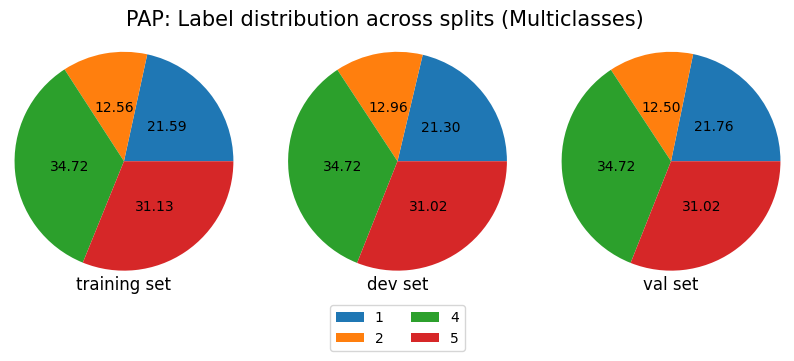

In [23]:
# visualize labels distribution for multiclasses
label_names = ["1", "2", "4", "5"]
train_counts = list(pap_multi_train_labels_count.values())
dev_counts = list(pap_multi_dev_labels_count.values())
val_counts = list(pap_multi_test_labels_count.values())

# create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(10,3)
fig.suptitle("PAP: Label distribution across splits (Multiclasses)", y=1, fontsize=15)
fig.subplots_adjust(wspace=.2)

# plot each pie chart in a separate subplot
ax1.pie(train_counts, labeldistance=None, autopct='%.2f', radius=1.2, pctdistance=0.5)
ax1.set_title("training set", y=-0.1)
ax2.pie(dev_counts, labeldistance=None, autopct='%.2f', radius=1.2, pctdistance=0.5)
ax2.set_title("dev set", y=-0.1)
ax3.pie(val_counts, labeldistance=None, autopct='%.2f', radius=1.2, pctdistance=0.5)
ax3.set_title("val set", y=-0.1)

# set legend
ax2.legend(label_names, bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=2)

- The pie charts show comparison of PAP dataset label distribution across three splits: train, dev, and val in multiclasses setting.
- Labels range from a scale of 1 to 5, while the neutral scale (3) is omitted.
- Label distribution is consistent across all split.
- The majority of data is labelled as 4 and 5, each dominates approximately one third of the charts.


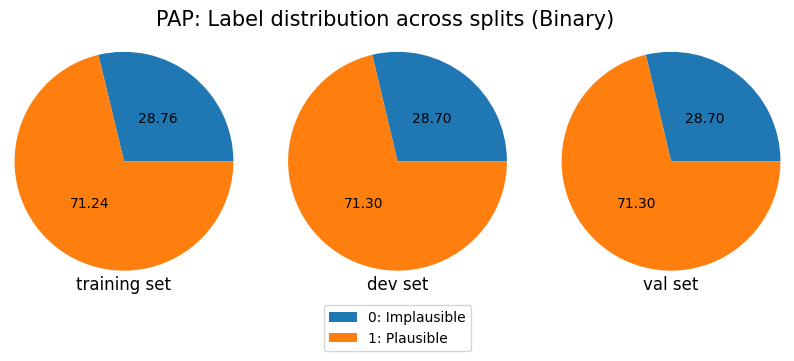

In [24]:
# visualize labels distribution for binary labels
label_names = ["0: Implausible", "1: Plausible"]
train_counts = list(pap_bin_train_labels_count.values())
dev_counts = list(pap_bin_dev_labels_count.values())
val_counts = list(pap_bin_test_labels_count.values())

# create a figure with three subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(10,3)
fig.suptitle("PAP: Label distribution across splits (Binary)", y=1, fontsize=15)
fig.subplots_adjust(wspace=.2)

# plot each pie chart in a separate subplot
ax1.pie(train_counts, labeldistance=None, autopct='%.2f', radius=1.2, pctdistance=0.5)
ax1.set_title("training set", y=-0.1)
ax2.pie(dev_counts, labeldistance=None, autopct='%.2f', radius=1.2, pctdistance=0.5)
ax2.set_title("dev set", y=-0.1)
ax3.pie(val_counts, labeldistance=None, autopct='%.2f', radius=1.2, pctdistance=0.5)
ax3.set_title("val set", y=-0.1)

# set legend
ax2.legend(label_names, bbox_to_anchor=(0.5, -0.1), loc='upper center')

- The pie charts show comparison of PAP dataset label distribution across three splits: train, dev, and val in binary setting.
- Label 1 and 2 from multiclasses setting are merged as "Implausible", while 4 and 5 as "Plausible".
- In the same manner with multicalsses setting, the neutral scale (3) is omitted.
- Label distribution is consistent across all split.
- The majority of data is labelled as "Plausible", which dominates approximately two third of the charts.


| class label | :---| aaa|
|binary |:---:| bbb|

#### Characteristic 2: ???

#### Characteristic 3: ???

#### Characteristic 4: ???

#### Characteristic 5: ???